In [78]:
import numpy as np
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score, GridSearchCV
from sklearn.metrics import f1_score, precision_score, precision_recall_curve, recall_score, accuracy_score, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.compose import ColumnTransformer


In [3]:
#Import the data 
# read all tables 
customer_final = pd.read_csv('https://raw.githubusercontent.com/delinai/schulich_ds1_2024/main/Datasets/customers_final.csv')
engagement_final = pd.read_csv('https://raw.githubusercontent.com/delinai/schulich_ds1_2024/main/Datasets/engagements_final.csv')
marketing_final = pd.read_csv('https://raw.githubusercontent.com/delinai/schulich_ds1_2024/main/Datasets/marketing_final.csv')
transactions_final = pd.read_csv('https://raw.githubusercontent.com/delinai/schulich_ds1_2024/main/Datasets/transactions_final.csv')




conduct data analysis/ visualization


In [14]:
# USE head() to see top 5 rows of each 
customer_final.head() 


,customer_id,join_date,last_purchase_date,age,gender,location
0,1,2023-11-20,2024-03-17,56.0,Female,North Shannonbury
1,2,2021-09-08,2023-10-25,NaN,Male,Hillville
2,3,2021-06-01,2022-11-27,NaN,NaN,North Latoyatown
3,4,2022-01-01,2022-09-01,29.0,Male,Grossstad
4,5,2022-01-24,2023-06-02,NaN,Male,East Matthewfort


In [15]:
engagement_final.head()

,customer_id,number_of_site_visits,number_of_emails_opened,number_of_clicks
0,1,10,15,1
1,2,285,49,51
2,3,192,73,25
3,4,110,30,17
4,5,161,2,7


In [16]:
marketing_final.head()



,campaign_id,customer_id,response,promotion_type,campaign_date
0,1,1,No,Buy One Get One,2024-02-29
1,2,1,No,Discount,2024-01-24
2,3,1,No,Free Shipping,2024-03-05
3,4,1,Yes,Buy One Get One,2024-01-10
4,5,2,Yes,Free Shipping,2022-07-08


In [17]:
transactions_final.head()


,transaction_id,customer_id,transaction_date,transaction_amount,product_category
0,1,1,2024-02-03,165.56,Clothing
1,2,1,2024-03-02,699.01,Home Goods
2,3,1,2024-03-12,146.86,Home Goods
3,4,1,2024-01-20,927.46,Electronics
4,5,1,2024-02-25,1395.87,Electronics


explain what looking at it gave u 
- see number of rows 

basic statis for each data set 

In [21]:
print(customer_final.describe())
print(customer_final.info())

       customer_id          age
count  10000.00000  8991.000000
mean    5000.50000    43.467467
std     2886.89568    15.094380
min        1.00000    18.000000
25%     2500.75000    30.000000
50%     5000.50000    44.000000
75%     7500.25000    57.000000
max    10000.00000    69.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_id         10000 non-null  int64  
 1   join_date           10000 non-null  object 
 2   last_purchase_date  10000 non-null  object 
 3   age                 8991 non-null   float64
 4   gender              9467 non-null   object 
 5   location            10000 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 468.9+ KB
None


age has null 
gender has null 
may need to drop or impute null 
all right data type 
doing statistics for only numerical values 
date is object 

In [24]:

print(engagement_final.info())
print(engagement_final.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   customer_id              10000 non-null  int64
 1   number_of_site_visits    10000 non-null  int64
 2   number_of_emails_opened  10000 non-null  int64
 3   number_of_clicks         10000 non-null  int64
dtypes: int64(4)
memory usage: 312.6 KB
None
       customer_id  number_of_site_visits  number_of_emails_opened  \
count  10000.00000           10000.000000             10000.000000   
mean    5000.50000             100.111900                39.862100   
std     2886.89568             118.625052                46.511719   
min        1.00000               1.000000                 1.000000   
25%     2500.75000              15.000000                 6.000000   
50%     5000.50000              53.000000                22.000000   
75%     7500.25000             141.000000     

all data there 

In [25]:
print(marketing_final.info())
print(marketing_final.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25200 entries, 0 to 25199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   campaign_id     25200 non-null  int64 
 1   customer_id     25200 non-null  int64 
 2   response        25200 non-null  object
 3   promotion_type  25200 non-null  object
 4   campaign_date   25200 non-null  object
dtypes: int64(2), object(3)
memory usage: 984.5+ KB
None
        campaign_id   customer_id
count  25200.000000  25200.000000
mean   12600.500000   4998.330357
std     7274.757728   2882.991935
min        1.000000      1.000000
25%     6300.750000   2511.000000
50%    12600.500000   5001.000000
75%    18900.250000   7486.000000
max    25200.000000  10000.000000


all data there 
each as 25200 
date is object 

In [26]:
print(transactions_final.info())
print(transactions_final.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129545 entries, 0 to 129544
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   transaction_id      129545 non-null  int64  
 1   customer_id         129545 non-null  int64  
 2   transaction_date    129545 non-null  object 
 3   transaction_amount  129545 non-null  float64
 4   product_category    129545 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 4.9+ MB
None
       transaction_id    customer_id  transaction_amount
count   129545.000000  129545.000000       129545.000000
mean     64773.000000    4998.806237          597.287659
std      37396.564648    2882.049926          491.564174
min          1.000000       1.000000           10.020000
25%      32387.000000    2494.000000          228.320000
50%      64773.000000    5006.000000          438.380000
75%      97159.000000    7476.000000          846.980000
max     129545.00

all data there 
date is object 

In [28]:
# Check for missing values in customers dataset
print(customer_final.isnull().sum())

# Check for missing values in transactions dataset
print(transactions_final.isnull().sum())

# Check for missing values in engagements dataset
print(engagement_final.isnull().sum())

# Check for missing values in marketing dataset
print(marketing_final.isnull().sum())

customer_id              0
join_date                0
last_purchase_date       0
age                   1009
gender                 533
location                 0
dtype: int64
transaction_id        0
customer_id           0
transaction_date      0
transaction_amount    0
product_category      0
dtype: int64
customer_id                0
number_of_site_visits      0
number_of_emails_opened    0
number_of_clicks           0
dtype: int64
campaign_id       0
customer_id       0
response          0
promotion_type    0
campaign_date     0
dtype: int64


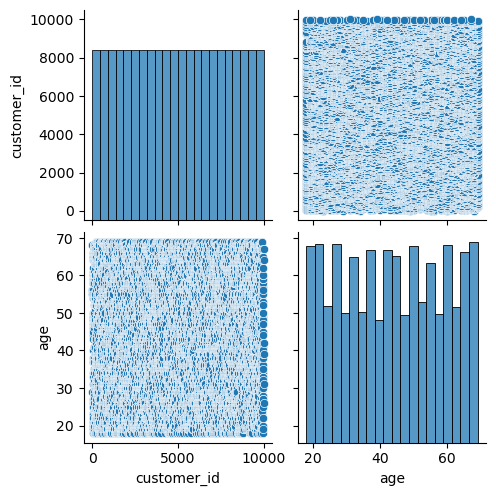

In [29]:
sns.pairplot(customer_final)

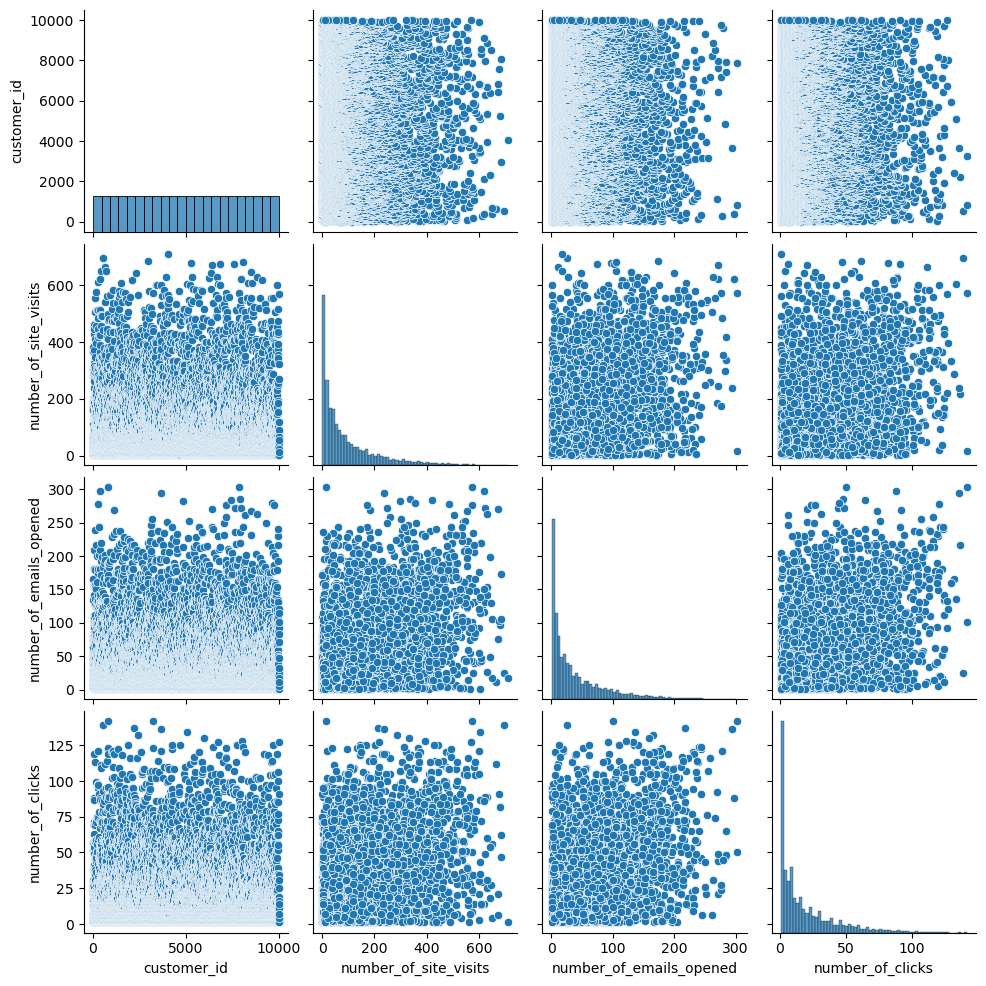

In [30]:
sns.pairplot(engagement_final)


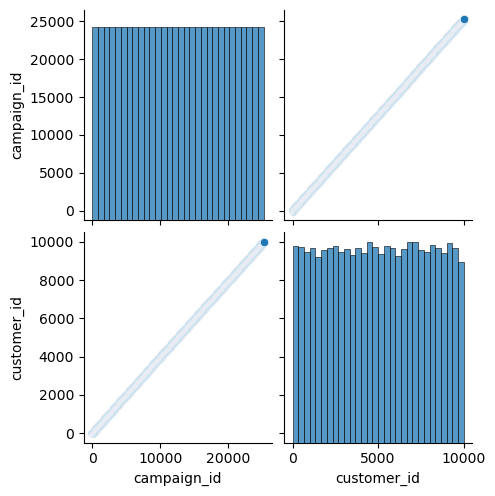

In [31]:
sns.pairplot(marketing_final)

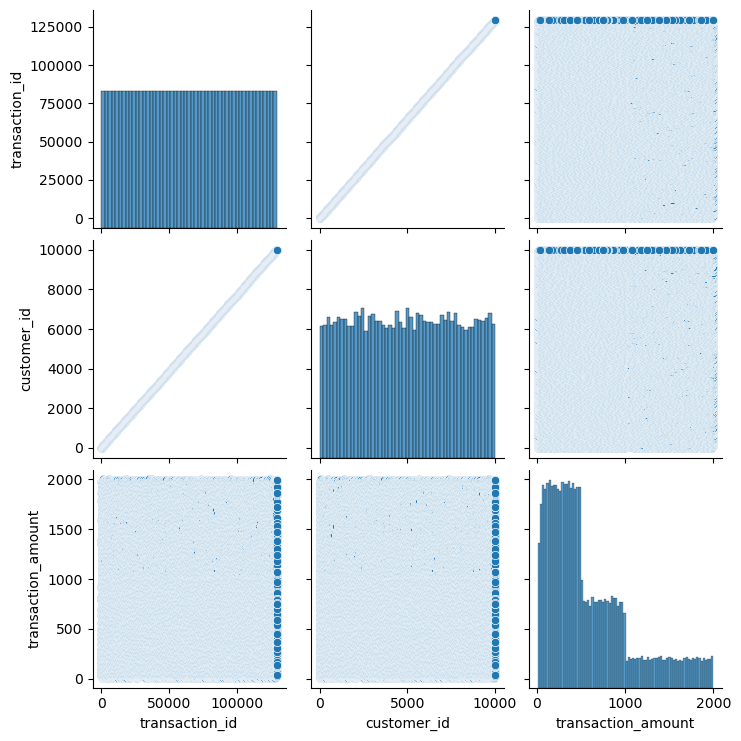

In [32]:
sns.pairplot(transactions_final)

TypeError: unsupported operand type(s) for +: 'Timestamp' and 'Timestamp'

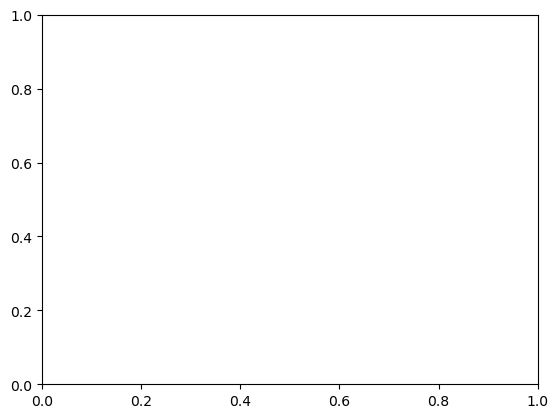

In [82]:
plt.boxplot(transactions_final)

In [43]:
duplicate_count_ma = marketing_final.duplicated().sum()
print(duplicate_count_ma)

0


In [41]:
duplicate_count_e = engagement_final.duplicated().sum()
print(duplicate_count_e)

0


In [40]:

duplicate_count_m = marketing_final.duplicated().sum()
print(duplicate_count_m)

0


In [42]:

duplicate_count_t = transactions_final.duplicated().sum()
print(duplicate_count_t)

0


from preliminary analysis before cleaning and processing have gotten next steps 
- deal with null 
- deal date being object 
- create new 


In [44]:
# deal with gender null 
# deal with age null
customer_final.dropna(subset=['gender', 'age'], inplace=True)



In [45]:
# check if no null left 
print(customer_final.isnull().sum())

customer_id           0
join_date             0
last_purchase_date    0
age                   0
gender                0
location              0
dtype: int64


as discussed in class imputing gender can casue ethical concerns so decided to drop 

now dealing with date time not being right data type

In [48]:
customer_final['join_date'] = pd.to_datetime(customer_final['join_date'])
customer_final['last_purchase_date'] = pd.to_datetime(customer_final['last_purchase_date'])
transactions_final['transaction_date'] = pd.to_datetime(transactions_final['transaction_date'])
marketing_final['campaign_date'] = pd.to_datetime(marketing_final['campaign_date'])

In [50]:
print(customer_final.info())

<class 'pandas.core.frame.DataFrame'>
Index: 8522 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   customer_id         8522 non-null   int64         
 1   join_date           8522 non-null   datetime64[ns]
 2   last_purchase_date  8522 non-null   datetime64[ns]
 3   age                 8522 non-null   float64       
 4   gender              8522 non-null   object        
 5   location            8522 non-null   object        
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 466.0+ KB
None


In [52]:
print(transactions_final.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129545 entries, 0 to 129544
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   transaction_id      129545 non-null  int64         
 1   customer_id         129545 non-null  int64         
 2   transaction_date    129545 non-null  datetime64[ns]
 3   transaction_amount  129545 non-null  float64       
 4   product_category    129545 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 4.9+ MB
None


In [61]:
print(marketing_final.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25200 entries, 0 to 25199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   campaign_id     25200 non-null  int64         
 1   customer_id     25200 non-null  int64         
 2   response        25200 non-null  object        
 3   promotion_type  25200 non-null  object        
 4   campaign_date   25200 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 984.5+ KB
None


all changed to date time 

freature enginnering 

merging data 

In [62]:
transactions_agg = transactions_final.groupby('customer_id').aggregate({'transaction_id':'count','transaction_amount':'sum'})

In [75]:
transactions_agg 

,transaction_id,transaction_amount
customer_id,,
1,6,3509.48
2,9,6081.32
3,6,1454.87
4,20,7874.68
5,24,15524.55
...,...,...
9996,10,5498.20
9997,12,5848.30
9998,3,3503.13


In [68]:
customer_final.set_index('customer_id', inplace=True)
engagement_final.set_index('customer_id', inplace=True)
marketing_final.set_index('customer_id', inplace=True)

KeyError: "None of ['customer_id'] are in the columns"

In [69]:
joint_data = customer_final.join(engagement_final).join(transactions_agg).join(marketing_final)

In [70]:
joint_data

,join_date,last_purchase_date,age,gender,location,number_of_site_visits,number_of_emails_opened,number_of_clicks,transaction_id,transaction_amount,campaign_id,customer_id,response,promotion_type,campaign_date
customer_id,,,,,,,,,,,,,,,
1,2023-11-20,2024-03-17,56.0,Female,North Shannonbury,10,15,1,6,3509.48,2,1,No,Discount,2024-01-24
4,2022-01-01,2022-09-01,29.0,Male,Grossstad,110,30,17,20,7874.68,5,2,Yes,Free Shipping,2022-07-08
6,2022-01-01,2023-02-10,55.0,Female,North Richardfort,74,59,7,17,10254.44,7,2,No,Discount,2023-04-12
8,2023-02-09,2023-08-09,68.0,Male,Marquezton,60,22,7,15,11710.62,9,3,No,Buy One Get One,2022-08-11
9,2022-01-24,2023-08-15,68.0,Female,West Franciscobury,49,43,21,22,10382.96,10,3,Yes,Buy One Get One,2021-11-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,2022-12-16,2023-08-13,42.0,Female,Johnstonborough,119,47,16,10,5498.20,9997,3976,No,Free Shipping,2022-11-19
9997,2022-07-09,2023-01-25,26.0,Male,Jessicamouth,3,33,14,12,5848.30,9998,3976,Yes,Buy One Get One,2022-09-18
9998,2023-09-17,2024-01-30,39.0,Male,New John,53,17,5,3,3503.13,9999,3977,Yes,Buy One Get One,2024-04-17


create new columnd 

In [71]:
joint_data['customer_lifetime'] = (joint_data['last_purchase_date'] - joint_data['join_date']).dt.days

In [72]:
joint_data.head()


,join_date,last_purchase_date,age,gender,location,number_of_site_visits,number_of_emails_opened,number_of_clicks,transaction_id,transaction_amount,campaign_id,customer_id,response,promotion_type,campaign_date,customer_lifetime
customer_id,,,,,,,,,,,,,,,,
1,2023-11-20,2024-03-17,56.0,Female,North Shannonbury,10,15,1,6,3509.48,2,1,No,Discount,2024-01-24,118
4,2022-01-01,2022-09-01,29.0,Male,Grossstad,110,30,17,20,7874.68,5,2,Yes,Free Shipping,2022-07-08,243
6,2022-01-01,2023-02-10,55.0,Female,North Richardfort,74,59,7,17,10254.44,7,2,No,Discount,2023-04-12,405
8,2023-02-09,2023-08-09,68.0,Male,Marquezton,60,22,7,15,11710.62,9,3,No,Buy One Get One,2022-08-11,181
9,2022-01-24,2023-08-15,68.0,Female,West Franciscobury,49,43,21,22,10382.96,10,3,Yes,Buy One Get One,2021-11-15,568


In [74]:
print(joint_data.isnull().sum())

join_date                  0
last_purchase_date         0
age                        0
gender                     0
location                   0
number_of_site_visits      0
number_of_emails_opened    0
number_of_clicks           0
transaction_id             0
transaction_amount         0
campaign_id                0
customer_id                0
response                   0
promotion_type             0
campaign_date              0
customer_lifetime          0
dtype: int64


In [ ]:
#customer lifetime value 
joint_data['customer_lifetime_value'] = joint_data['total_spent']